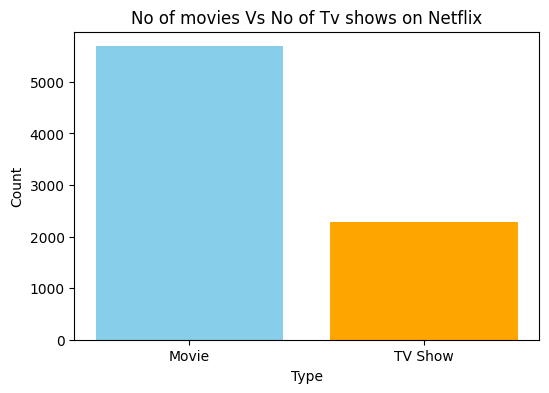

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

#load data
df=pd.read_csv('netflix_titles.csv')

#clean data
df=df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title('No of movies Vs No of Tv shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')

plt.savefig('movies_vs_tvshows.png')
plt.show()

In [10]:
type_counts=df['type'].value_counts()


In [11]:
type_counts

type
Movie      5687
TV Show    2283
Name: count, dtype: int64

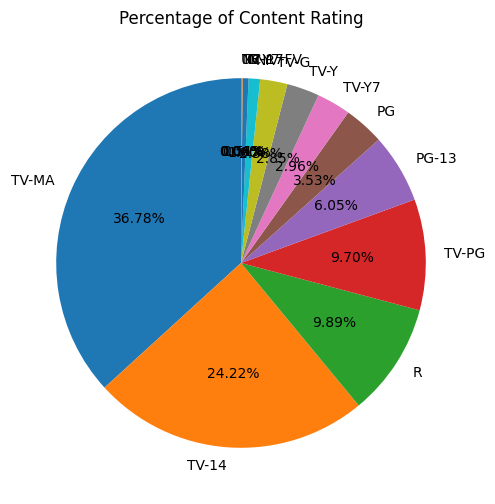

In [23]:
rating_count=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_count,labels=rating_count.index,autopct='%2.2f%%',startangle=90)

plt.title('Percentage of Content Rating')
plt.savefig('content_rating_pie.png')




In [16]:
rating_count

rating
TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

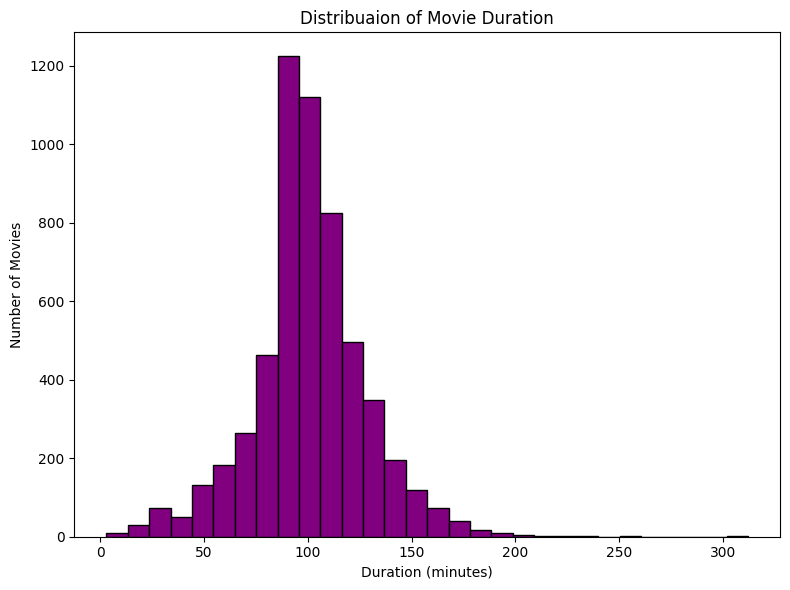

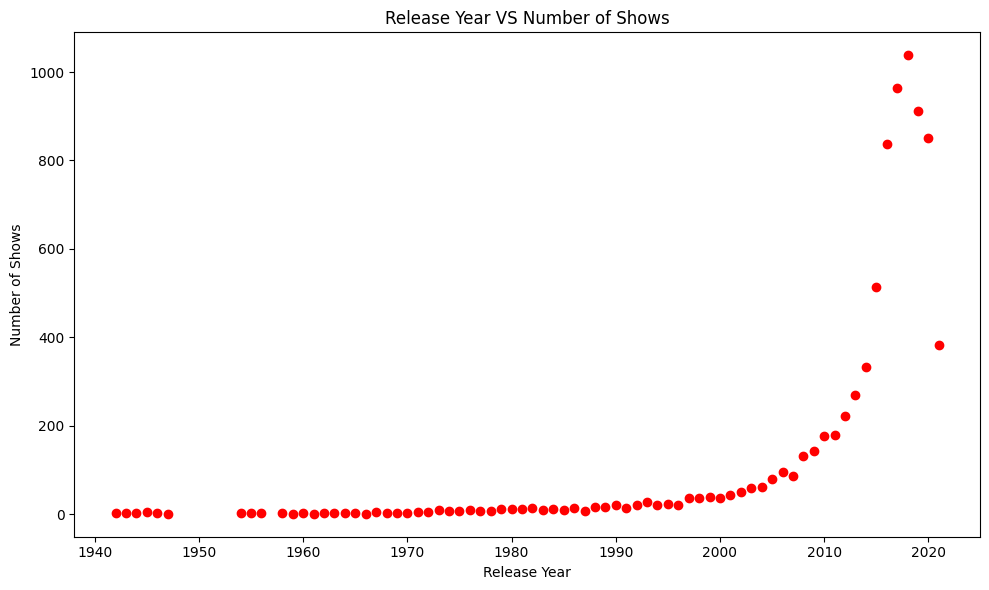

In [ ]:
#Histogram
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribuaion of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()


#Scatter Plot
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release.png')
plt.show()


In [25]:
country_counts=df['country'].value_counts().head(10)


In [26]:
country_counts

country
United States     2815
India              972
United Kingdom     419
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

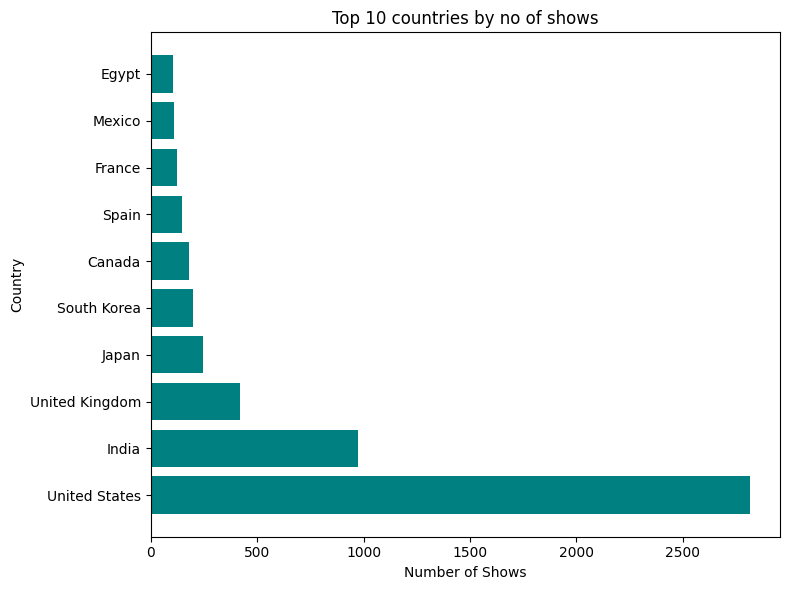

In [31]:
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('Top 10 countries by no of shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
#plt.legend()
#plt.savefig('release.png')
plt.show()

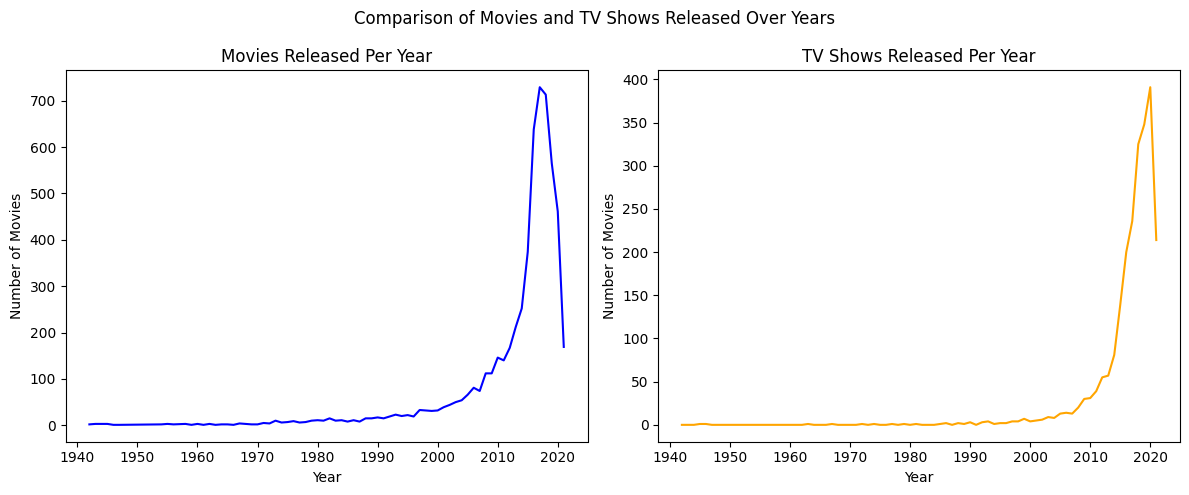

In [32]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# first subplot: movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Movies')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')

plt.tight_layout()
#plt.savefig('movies_vs_tvshows.png')
plt.show()


In [33]:
content_by_year

type,Movie,TV Show
release_year,,
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,1.0
1946,1.0,1.0
...,...,...
2017,729.0,236.0
2018,713.0,325.0
2019,565.0,348.0
